# Can you find a customer pattern from this dataset?

In [34]:
# Importing the libraries and dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

case2_df = pd.read_csv('..\StoutCaseStudy\casestudy.csv')

# Exploratory Data Analysis

In [35]:
# Displaying the shape of the dataset.
print(case2_df.shape)

(685927, 4)


In [36]:
# Performing a null check on this dataset.
case2_df.isnull().sum()

index             0
customer_email    0
net_revenue       0
year              0
dtype: int64

In [37]:
# Displaying the top rows of this dataset.
case2_df.head()

,index,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


# Collecting Useful Information

## Total customer revenue for each year

In [38]:
# Revenue for the year of 2015.
y2015 = case2_df.loc[case2_df['year'] == 2015, 'net_revenue'].sum()

y2015

29036749.189999994

In [39]:
# Revenue for the year of 2016.
y2016 = case2_df.loc[case2_df['year'] == 2016, 'net_revenue'].sum()

y2016

25730943.59

In [40]:
# Revenue for the year of 2017.
y2017 = case2_df.loc[case2_df['year'] == 2017, 'net_revenue'].sum()

y2017

31417495.030000016

In [41]:
# Creating a data frame with total revenue for each year.

tcr = pd.DataFrame({'2015' : [2903679.19], '2016' : [25730943.59], '2017' : [31417495.03]})

tcr

,2015,2016,2017
0,2903679.19,25730943.59,31417495.03


## New customer revenue for each year

In [42]:
# New customer revenue for the year of 2015.
newcr2015 = case2_df.loc[(case2_df['year'] == 2015) & (case2_df['index'] > 230000), 'net_revenue'].sum()

newcr2015

164423.15000000002

In [43]:
# New customer revenue for the year of 2016.
newcr2016 = case2_df.loc[(case2_df['year'] == 2016) & (case2_df['index'] > 435100), 'net_revenue'].sum()

newcr2016

107224.26999999999

In [44]:
# New customer revenue for the year of 2017.
newcr2017 = case2_df.loc[(case2_df['year'] == 2017) & (case2_df['index'] > 663000), 'net_revenue'].sum()

newcr2017

2873208.85

In [45]:
# Creating a data frame with new customer revenue for each year.
ncr = pd.DataFrame({'2015' : [164423.15], '2016' : [107224.27], '2017' : [2873208.85]})

ncr

,2015,2016,2017
0,164423.15,107224.27,2873208.85


## Existing customer revenue growth for each year

In [46]:
# Calculating the revenue of existing customers.
excr = tcr - ncr

excr

,2015,2016,2017
0,2739256.04,25623719.32,28544286.18


In [47]:
# Calculating the growth of existing customers.
excr_df = pd.DataFrame({'Year': ['2015', '2016', '2017'],
                   'Revenue': [2739256.04, 25623719.32, 28544286.18]})

excr_df['Year'] = pd.to_datetime(excr_df['Year'])
excr_df.set_index('Year', inplace = True)
new_excr_df = excr_df.groupby(pd.Grouper(freq = "Y")).tail(1).reset_index()
new_excr_df['Growth Rate'] = (new_excr_df['Revenue'] - new_excr_df['Revenue'].shift(1)) / new_excr_df['Revenue'].shift(1)

new_excr_df.head()

,Year,Revenue,Growth Rate
0,2015-01-01,2739256.04,NaN
1,2016-01-01,25623719.32,8.354262
2,2017-01-01,28544286.18,0.113979


## Existing customer revenue for each year

In [48]:
# Calculating the revenue of existing customers.
excr = tcr - ncr

excr

,2015,2016,2017
0,2739256.04,25623719.32,28544286.18


## Existing customer revenue for each prior year 

In [49]:
# Calculating existing customer revenue for 2014.
y2014 = excr['2015'] / 2

y2014

0    1369628.02
Name: 2015, dtype: float64

In [50]:
# Calculating existing customer revenue for 2013.
y2013 = y2014 / 2

y2013

0    684814.01
Name: 2015, dtype: float64

In [51]:
# Calculating existing customer revenue for 2012.
y2012 = y2013 / 2

y2012

0    342407.005
Name: 2015, dtype: float64

In [52]:
# Creating a data frame with existing customer revenue for each prior year.
excr_pry = pd.DataFrame({'2012' : [342407.00], '2013' : [684814.01], '2014' : [1369628.02]})

excr_pry

,2012,2013,2014
0,342407.0,684814.01,1369628.02


## Revenue lost from customer attrition for each year 

In [53]:
# Calculating lost revenue from customer attrition for each year.
lost_reve = excr - ncr

lost_reve

,2015,2016,2017
0,2574832.89,25516495.05,25671077.33


## Total customers for each year 

In [54]:
# Total customer count for the year of 2015.
y2015_tot_cust = case2_df.loc[case2_df['year'] == 2015, 'customer_email'].count()

y2015_tot_cust

231294

In [55]:
# Total customer count for the year of 2016.
y2016_tot_cust = case2_df.loc[case2_df['year'] == 2016, 'customer_email'].count()

y2016_tot_cust

204646

In [56]:
# Total customer count for the year of 2017.
y2017_tot_cust = case2_df.loc[case2_df['year'] == 2017, 'customer_email'].count()

y2017_tot_cust

249987

In [57]:
# Creating a data frame with total customer count for each year.
total_customers = pd.DataFrame({'2015' : [231294], '2016' : [204646], '2017' : [249987]})

total_customers

,2015,2016,2017
0,231294,204646,249987


## New customers for each year 

In [58]:
# New customer count for the year of 2015.
newcustomers2015 = case2_df.loc[(case2_df['year'] == 2015) & (case2_df['index'] > 230000), 'customer_email'].count()

newcustomers2015

1293

In [59]:
# New customer count for the year of 2016.
newcustomers2016 = case2_df.loc[(case2_df['year'] == 2016) & (case2_df['index'] > 435100), 'customer_email'].count()

newcustomers2016

839

In [60]:
# New customer count for the year of 2017.
newcustomers2017 = case2_df.loc[(case2_df['year'] == 2017) & (case2_df['index'] > 663000), 'customer_email'].count()

newcustomers2017

22926

In [61]:
# Creating a data frame with new customer counts for each year.
newcustomers = pd.DataFrame({'2015' : [1293], '2016' : [839], '2017' : [22926]})

newcustomers

,2015,2016,2017
0,1293,839,22926


## Lost customers for each year 

In [62]:
# Calculating the count of lost customers for each year.
lost_customers = total_customers - newcustomers

lost_customers

,2015,2016,2017
0,230001,203807,227061


# Data Visualizations

In [63]:
# Calculating the count of orders for the year 2015.
orders2015 = case2_df.loc[(case2_df['year'] == 2015) & (case2_df['net_revenue'] < 10), 'net_revenue'].count()

orders2015

8331

In [64]:
# Calculating the count of orders for the year 2016.
orders2016 = case2_df.loc[(case2_df['year'] == 2016) & (case2_df['net_revenue'] < 10), 'net_revenue'].count()

orders2016

7342

In [65]:
# Calculating the count of orders for the year 2017.
orders2017 = case2_df.loc[(case2_df['year'] == 2017) & (case2_df['net_revenue'] < 10), 'net_revenue'].count()

orders2017

9005

## Pie Chart of orders less than 10 usd

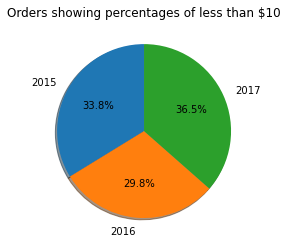

In [66]:
# Pie chart of all the years' orders showing percentages of orders < $10.
name = '2015', '2016', '2017',
count = [8331, 7342, 9005]

# Creating a Pie Chart.
plt.pie(count, labels = name, labeldistance = 1.15,  autopct='%1.1f%%', shadow=True, startangle=90);
plt.title('Orders showing percentages of less than $10');
plt.show();

## Bar Charts of comparisons 

Text(0, 0.5, 'Lost/Gained Revenue')

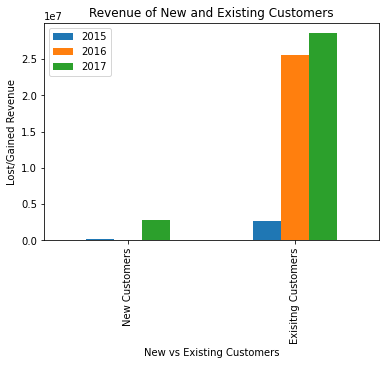

In [67]:
# Revenue lost/gained for existing customers and new customers
plotdata = pd.DataFrame({"2015" : [164423.15, 2739256.04], "2016" : [107224.27, 25623719.32], "2017" : [2873208.85, 28544286.18]}, index = ["New Customers", "Exisitng Customers"])

#Creating a Bar Chart.
plotdata.plot(kind = "bar")
plt.title("Revenue of New and Existing Customers")
plt.xlabel("New vs Existing Customers")
plt.ylabel("Lost/Gained Revenue")

Text(0, 0.5, 'Revenue & Attrition')

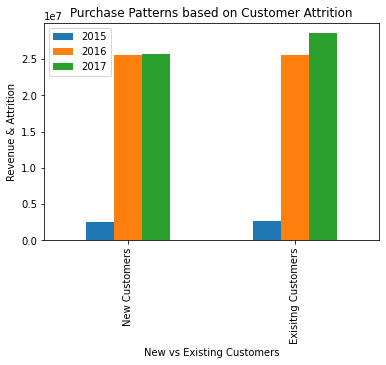

In [68]:
# New vs existing customers purchase patterns based on customer attrition.
plotdata2 = pd.DataFrame({"2015" : [2574832.89, 2739256.04], "2016" : [ 25516495.05, 25623719.32], "2017" : [25671077.33, 28544286.18]}, index = ["New Customers", "Exisitng Customers"])

#Creating a Bar Chart.
plotdata2.plot(kind = "bar")
plt.title("Purchase Patterns based on Customer Attrition")
plt.xlabel("New vs Existing Customers")
plt.ylabel("Revenue & Attrition")